In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
class PCAKMeansCluster:
    def __init__(self, n_components=2, n_clusters=3, max_iters=100):
        self.n_components = n_components
        self.n_clusters = n_clusters
        self.max_iters = max_iters
    def fit(self, X):
        # Standardize the data (optional but recommended for PCA)
        mean = np.mean(X, axis=0)
        std_dev = np.std(X, axis=0)
        X_std = (X - mean) / std_dev
        # Calculate the covariance matrix
        cov_matrix = np.cov(X_std, rowvar=False)
        # Perform eigenvalue decomposition to find principal components
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        eigenvalue_indices = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[:, eigenvalue_indices]
        eigenvalues = eigenvalues[eigenvalue_indices]
        # Choose the number of principal components
        self.principal_components = eigenvectors[:, :self.n_components]
        # Project the data onto the principal components
        self.X_pca = np.dot(X_std, self.principal_components)
        # Implement K-Means clustering
        self.labels, self.centroids = self._kmeans(self.X_pca)
    def _kmeans(self, X):
        np.random.seed(0)
        n_samples, n_features = X.shape

        # Initialize centroids by randomly selecting data points
        initial_centroid_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        centroids = X[initial_centroid_indices]

        for _ in range(self.max_iters):
            # Assign each data point to the nearest centroid
            distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
            labels = np.argmin(distances, axis=1)

            # Update the centroids
            new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])
            # Check for convergence using a tolerance
            if np.all(np.isclose(new_centroids, centroids, atol=1e-4)):
                break
            centroids = new_centroids

        return labels, centroids




In [29]:
df = pd.read_excel('20231006-0002_14.xlsx', sheet_name='Sheet2')
y = df['Channel A']
x = df['Channel B']
t = df['Time']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


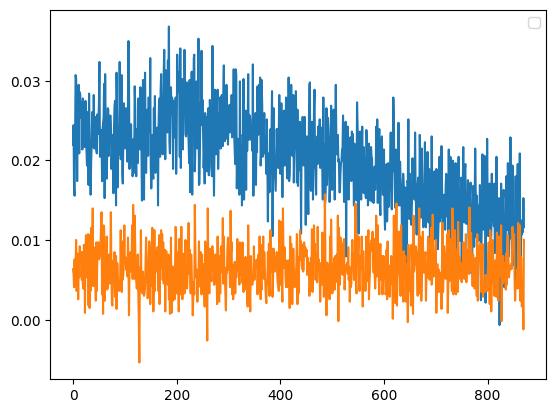

In [10]:
if __name__ == "__main__":
    np.random.seed(0)
    n_samples = 300
    n_features = 2
    X = df
    pca_kmeans = PCAKMeansCluster(n_components=2, n_clusters=3, max_iters=100)
    pca_kmeans.fit(X)

    labels = pca_kmeans.labels
    centroids = pca_kmeans.centroids
    X_pca = pca_kmeans.X_pca

plt.plot(X)

plt.legend()
plt.show()

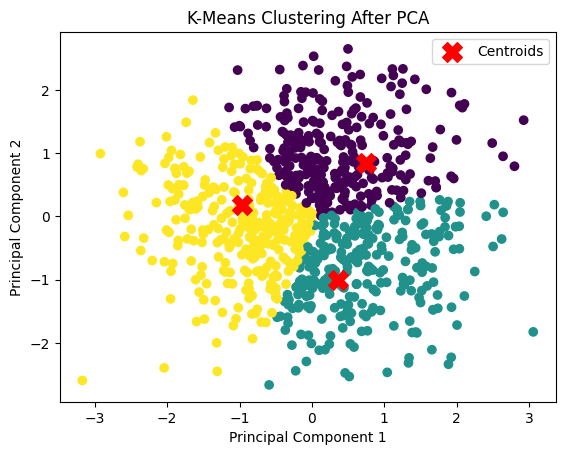

In [11]:

# Visualization (scatter plot of the clustered data)

plt.scatter(X_pca[:, 0], -X_pca[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('K-Means Clustering After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


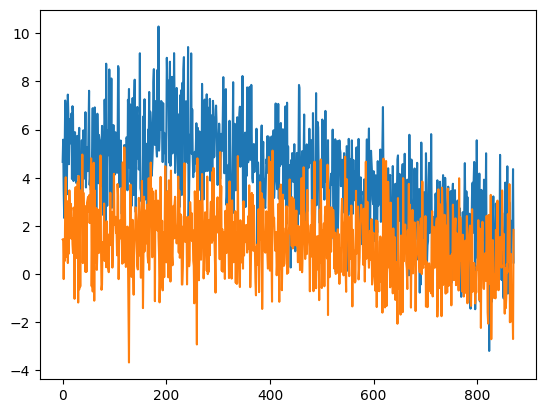

In [12]:

noise=200*df-X_pca
plt.plot(noise)


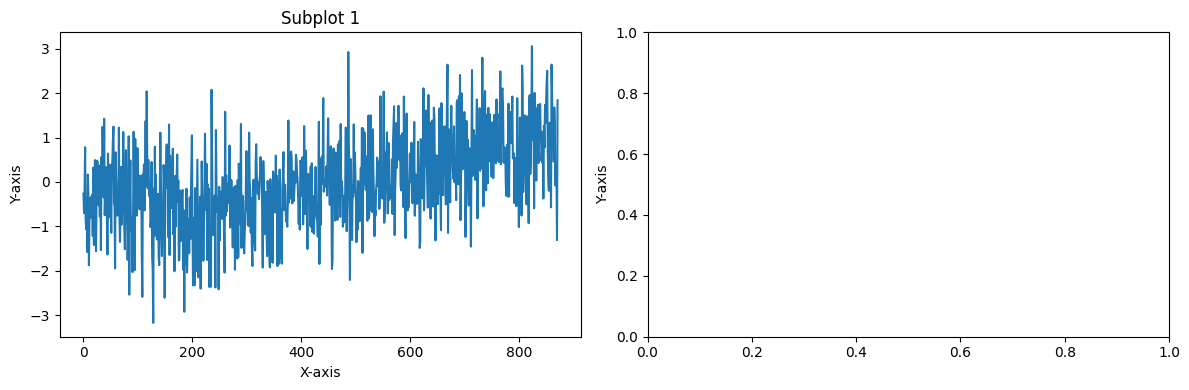

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot the first subplot (X_pca[:, 0])
axes[0].plot(X_pca[:, 0])
axes[0].set_title('Subplot 1')
axes[0].set_xlabel('X-axis')
axes[0].set_ylabel('Y-axis')

# Add any other customization or labels you need for the first subplot

# Plot the second subplot (X_pca[:, 0])ndom decrement technique indicates


axes[1].set_ylabel('Y-axis')
axes[0].set_ylabel('Y-axis')
# Add any other customization or labels you need for the second subplot

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Show the plots
plt.show()

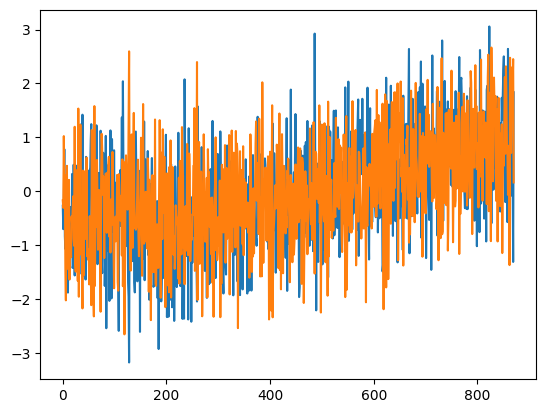

In [19]:
plt.plot(X_pca)
plt.show()

/tmp/ipykernel_7980/3039256376.py:27: RuntimeWarning: invalid value encountered in sqrt
  canonical_correlations = np.sqrt(eigenvalues.real)


Canonical Correlation Coefficients:
[7.34395262e+13 7.34395262e+13 6.40961311e+13 ...            nan
            nan            nan]

Canonical Loadings for X:
[[ 2.06327171e-04-2.40110458e-05j  2.06327171e-04+2.40110458e-05j
  -2.54363181e-04-8.78373645e-04j ...  9.72174809e-04+3.04533859e-04j
   9.72174809e-04-3.04533859e-04j  2.81527119e-07+0.00000000e+00j]
 [-2.06327171e-04+2.40110458e-05j -2.06327171e-04-2.40110458e-05j
   2.54363181e-04+8.78373645e-04j ... -9.72174809e-04-3.04533859e-04j
  -9.72174809e-04+3.04533859e-04j -2.81527119e-07+0.00000000e+00j]]

Canonical Loadings for Y:
[[ 1.61763437e-07+1.93663991e-06j  1.61763437e-07-1.93663991e-06j
  -1.01542368e-06-1.98901820e-07j ...  4.08878456e-09+1.40583473e-08j
   4.08878456e-09-1.40583473e-08j -4.41427542e-03+0.00000000e+00j]
 [-1.61763437e-07-1.93663991e-06j -1.61763437e-07+1.93663991e-06j
   1.01542368e-06+1.98901820e-07j ... -4.08878456e-09-1.40583473e-08j
  -4.08878456e-09+1.40583473e-08j  4.41427542e-03+0.00000000e+00j]]

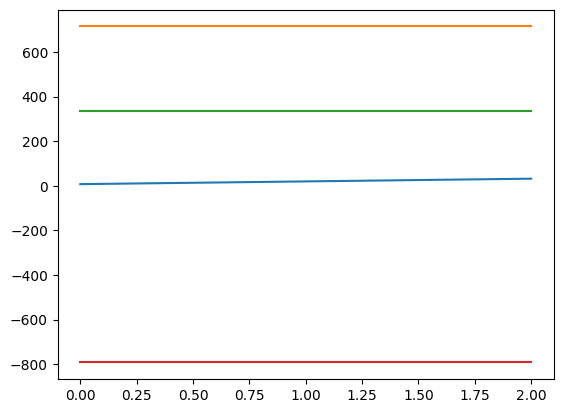

In [32]:
import numpy as np

# Define two sets of signals (X and Y)
X = [x,t]  # Replace with your own signal data
Y = [y,t]  # Replace with your own signal data

# Center the data (subtract mean)
X_mean = np.mean(X, axis=0)
Y_mean = np.mean(Y, axis=0)
X_centered = X - X_mean
Y_centered = Y - Y_mean

# Calculate the covariance matrices
C_xx = np.dot(X_centered.T, X_centered)
C_yy = np.dot(Y_centered.T, Y_centered)
C_xy = np.dot(X_centered.T, Y_centered)

# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(np.dot(np.linalg.inv(C_xx), C_xy, np.linalg.inv(C_yy)))

# Sort eigenvalues and eigenvectors in decreasing order
sorted_indices = np.argsort(eigenvalues.real)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Canonical correlation coefficients (square roots of eigenvalues)
canonical_correlations = np.sqrt(eigenvalues.real)

# Canonical loadings (eigenvectors)
canonical_loadings_X = np.dot(X_centered, eigenvectors)
canonical_loadings_Y = np.dot(Y_centered, eigenvectors)

print("Canonical Correlation Coefficients:")
print(canonical_correlations)
print("\nCanonical Loadings for X:")
print(canonical_loadings_X)
print("\nCanonical Loadings for Y:")
print(canonical_loadings_Y)
plt.plot(canon_scores_X)
plt.show()

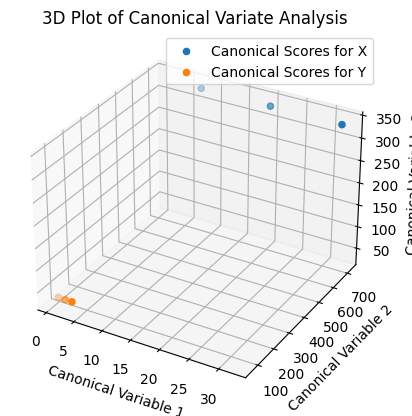

In [18]:

# Visualization (scatter plot of the clustered data)
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define two data sets (X and Y)
X = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12]])

Y = np.array([[0.1, 0.2, 0.3, 0.4],
              [0.5, 0.6, 0.7, 0.8],
              [0.9, 1.0, 1.1, 1.2]])

# Perform Canonical Variate Analysis
n = X.shape[0]  # Number of observations

# Calculate the covariance matrices for X and Y
C_xx += np.eye(C_xx.shape[0]) * 1e-6  # Add a small constant to the diagonal
C_yy += np.eye(C_yy.shape[0]) * 1e-6

# Calculate the cross-covariance matrix between X and Y
C_xy = np.cov(X, Y, rowvar=False, bias=True)

# Perform eigendecomposition of C_xy
eigenvalues, eigenvectors = eigh(C_xx, C_yy)

# Sort eigenvalues and eigenvectors in decreasing order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Canonical variate scores for X and Y
canon_scores_X = np.dot(X, eigenvectors)
canon_scores_Y = np.dot(Y, eigenvectors)

# Create a 3D scatter plot for the canonical scores
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(canon_scores_X[:, 0], canon_scores_X[:, 1], canon_scores_X[:, 2], label='Canonical Scores for X')
ax.scatter(canon_scores_Y[:, 0], canon_scores_Y[:, 1], canon_scores_Y[:, 2], label='Canonical Scores for Y')

ax.set_xlabel('Canonical Variable 1')
ax.set_ylabel('Canonical Variable 2')
ax.set_zlabel('Canonical Variable 3')
ax.set_title('3D Plot of Canonical Variate Analysis')
ax.legend()

plt.show()
